	1.	Data Analysis with Pandas and Numpy:
	•	We’ll start by loading the Excel file using Pandas and exploring the data.
	•	Perform some basic analysis to understand the structure of the dataset, identify missing values, and calculate summary statistics.
	•	Create a few visualizations using Matplotlib to uncover trends and patterns.
	

	2.	Machine Learning:
	•	If the data is suitable, we can proceed to build a machine learning model. This can involve:
	•	Supervised Learning: Models like Linear Regression, Classification, etc., if the dataset contains labels.
	•	Unsupervised Learning: Clustering techniques like K-Means, PCA, etc., for identifying underlying patterns if the data is unlabeled.
	

	3.	Data Visualization:
	•	Generate different types of plots like histograms, scatter plots, line plots, and correlation matrices to visualize the relationships between variables.
	

Step 1: Initial Data Exploration


Read the file

In [27]:
# Step 1: Import Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 2: Load Data from the "Data" Sheet
file_path = "Final_energy_data_25.9.24.xlsx"
data_df = pd.read_excel(file_path, sheet_name='Data')

# Step 3: Display Columns and Check for Missing Values
print("Columns in the dataset:\n", data_df.columns)
print("Missing Values:\n", data_df.isnull().sum())

# Step 4: Check if Columns Exist Before Dropping
columns_to_drop = ['COUNTR', 'Country Code']
existing_columns_to_drop = [col for col in columns_to_drop if col in data_df.columns]

# Drop columns only if they exist in the dataframe
if existing_columns_to_drop:
    data_df = data_df.drop(existing_columns_to_drop, axis=1)
    print(f"Columns {existing_columns_to_drop} dropped successfully.")
else:
    print(f"Columns {columns_to_drop} not found in the dataset.")

# Step 5: Convert or Encode Non-Numeric Columns
# Identify columns with non-numeric values
non_numeric_columns = data_df.select_dtypes(include=['object']).columns
print("Non-numeric Columns:", non_numeric_columns)

# Encode each non-numeric column using LabelEncoder
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data_df[column] = label_encoder.fit_transform(data_df[column])

# Step 6: Exploratory Data Analysis
# Display summary​⬤

Columns in the dataset:
 Index(['COUNTR', 'Country Code', 'Year', 'GDP', 'EPROD', 'CAPF', 'CAPS',
       'EITNS', 'COAL_ECONS', 'NATG_ECONS', 'OIL_ECONS', 'REW_ECONS',
       'TOTAL_ECONS', 'ELEC_CONS', 'POP', 'EIMPR'],
      dtype='object')
Missing Values:
 COUNTR          0
Country Code    0
Year            0
GDP             0
EPROD           0
CAPF            0
CAPS            0
EITNS           0
COAL_ECONS      0
NATG_ECONS      0
OIL_ECONS       0
REW_ECONS       0
TOTAL_ECONS     0
ELEC_CONS       0
POP             0
EIMPR           0
dtype: int64
Columns ['COUNTR', 'Country Code'] dropped successfully.
Non-numeric Columns: Index([], dtype='object')


In [16]:
data_df.head()


,COUNTR,Country Code,Year,GDP,EPROD,CAPF,CAPS,EITNS,COAL_ECONS,NATG_ECONS,OIL_ECONS,REW_ECONS,TOTAL_ECONS,ELEC_CONS,POP,EIMPR
0,Brunei Darussalam,BRN,1995,1.976922,12.644170,36.661699,0.546888,4.34,-0.000007,0.039536,0.022379,0.000007,0.061915,1.779,2.423676,-711.789337
1,Brunei Darussalam,BRN,1996,0.493136,12.922198,41.314294,0.546888,4.34,-0.000007,0.031788,0.025875,0.000007,0.057663,1.953,2.345748,-681.187465
2,Brunei Darussalam,BRN,1997,-3.679156,12.327908,35.493067,0.546888,4.34,-0.000007,0.035863,0.025803,0.000007,0.061666,2.234,2.266444,-651.149478
3,Brunei Darussalam,BRN,1998,-2.713190,12.310974,33.805310,0.546888,4.34,-0.000007,0.030973,0.024801,0.000007,0.055774,2.324,2.190603,-629.187508
4,Brunei Darussalam,BRN,1999,0.880167,12.442648,21.380018,0.546888,4.34,-0.000007,0.038454,0.027352,0.000007,0.065806,2.260,2.130189,-683.452774


In [17]:
data_df.columns

Index(['COUNTR', 'Country Code', 'Year', 'GDP', 'EPROD', 'CAPF', 'CAPS',
       'EITNS', 'COAL_ECONS', 'NATG_ECONS', 'OIL_ECONS', 'REW_ECONS',
       'TOTAL_ECONS', 'ELEC_CONS', 'POP', 'EIMPR'],
      dtype='object')

In [18]:
print("Missing Values:\n", data_df.isnull().sum())


Missing Values:
 COUNTR          0
Country Code    0
Year            0
GDP             0
EPROD           0
CAPF            0
CAPS            0
EITNS           0
COAL_ECONS      0
NATG_ECONS      0
OIL_ECONS       0
REW_ECONS       0
TOTAL_ECONS     0
ELEC_CONS       0
POP             0
EIMPR           0
dtype: int64


In [19]:
# Step 4: Exploratory Data Analysis
# Display summary statistics
print("\nSummary Statistics:\n", data_df.describe())


Summary Statistics:
               Year         GDP       EPROD        CAPF        CAPS  \
count   260.000000  260.000000  260.000000  260.000000  260.000000   
mean   2007.500000    3.627829   10.690599   25.322459    3.901258   
std       7.514465    3.967153    3.447729    6.997251    3.847715   
min    1995.000000  -14.475651    3.471582   10.437402    0.003014   
25%    2001.000000    2.315568    8.521669   19.573424    1.074415   
50%    2007.500000    4.329454   10.069162   24.502461    2.669317   
75%    2014.000000    5.679885   11.999296   30.335945    5.321456   
max    2020.000000   12.766646   21.290925   43.639902   18.633839   

            EITNS  COAL_ECONS  NATG_ECONS   OIL_ECONS   REW_ECONS  \
count  260.000000  260.000000  260.000000  260.000000  260.000000   
mean     4.627244    0.299858    0.452439    0.970006    0.047472   
std      1.484828    0.474560    0.533207    1.014508    0.064898   
min      2.130000   -0.000007    0.000342    0.004344   -0.015170   
25

In [29]:
# Drop unnecessary columns for the model (like 'COUNTR' and 'Country Code')
# data_df = data_df.drop(['COUNTR', 'Country Code'], axis=1)
data_df.head()


,Year,GDP,EPROD,CAPF,CAPS,EITNS,COAL_ECONS,NATG_ECONS,OIL_ECONS,REW_ECONS,TOTAL_ECONS,ELEC_CONS,POP,EIMPR
0,1995,1.976922,12.644170,36.661699,0.546888,4.34,-0.000007,0.039536,0.022379,0.000007,0.061915,1.779,2.423676,-711.789337
1,1996,0.493136,12.922198,41.314294,0.546888,4.34,-0.000007,0.031788,0.025875,0.000007,0.057663,1.953,2.345748,-681.187465
2,1997,-3.679156,12.327908,35.493067,0.546888,4.34,-0.000007,0.035863,0.025803,0.000007,0.061666,2.234,2.266444,-651.149478
3,1998,-2.713190,12.310974,33.805310,0.546888,4.34,-0.000007,0.030973,0.024801,0.000007,0.055774,2.324,2.190603,-629.187508
4,1999,0.880167,12.442648,21.380018,0.546888,4.34,-0.000007,0.038454,0.027352,0.000007,0.065806,2.260,2.130189,-683.452774


In [30]:
if existing_columns_to_drop:
    data_df = data_df.drop(existing_columns_to_drop, axis=1)
    print(f"Columns {existing_columns_to_drop} dropped successfully.")
else:
    print(f"Columns {columns_to_drop} not found in the dataset.")

#

KeyError: "['COUNTR', 'Country Code'] not found in axis"

Columns in the dataset:
 Index(['COUNTR', 'Country Code', 'Year', 'GDP', 'EPROD', 'CAPF', 'CAPS',
       'EITNS', 'COAL_ECONS', 'NATG_ECONS', 'OIL_ECONS', 'REW_ECONS',
       'TOTAL_ECONS', 'ELEC_CONS', 'POP', 'EIMPR'],
      dtype='object')
Missing Values:
 COUNTR          0
Country Code    0
Year            0
GDP             0
EPROD           0
CAPF            0
CAPS            0
EITNS           0
COAL_ECONS      0
NATG_ECONS      0
OIL_ECONS       0
REW_ECONS       0
TOTAL_ECONS     0
ELEC_CONS       0
POP             0
EIMPR           0
dtype: int64
Columns ['COUNTR', 'Country Code'] dropped successfully.
Non-numeric Columns: Index([], dtype='object')

Summary Statistics:
               Year         GDP       EPROD        CAPF        CAPS  \
count   260.000000  260.000000  260.000000  260.000000  260.000000   
mean   2007.500000    3.627829   10.690599   25.322459    3.901258   
std       7.514465    3.967153    3.447729    6.997251    3.847715   
min    1995.000000  -14.475651    

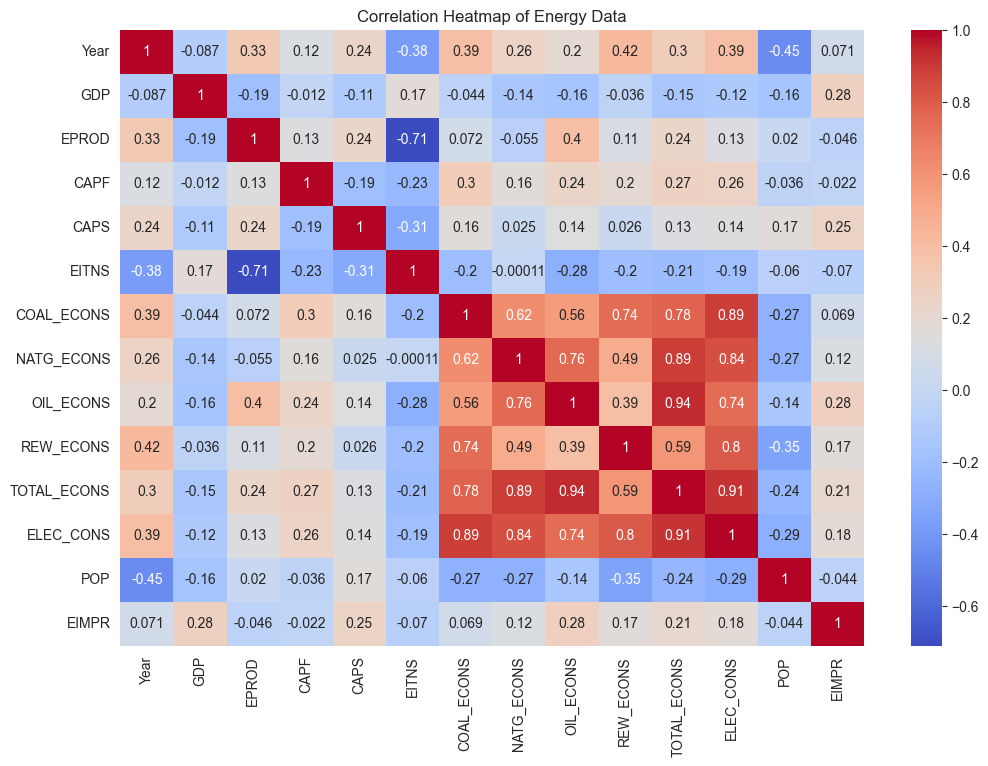

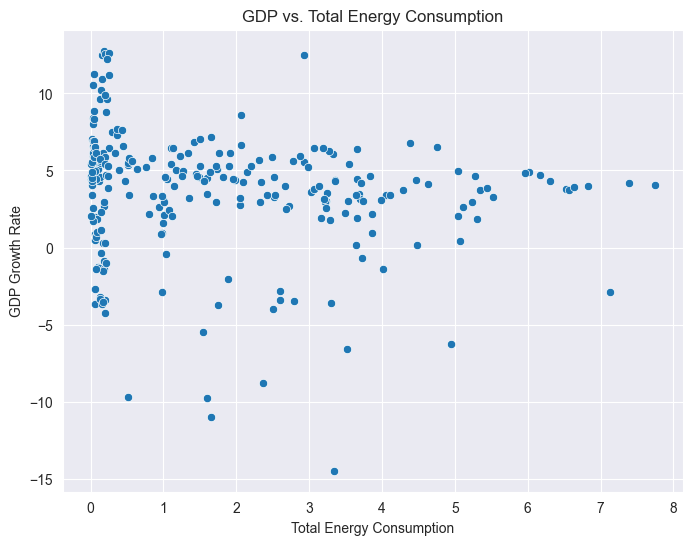

Mean Squared Error: 15.643884679227527
R-squared Score: 0.1349612752939


In [31]:
# Step 1: Import Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 2: Load Data from the "Data" Sheet
file_path = "Final_energy_data_25.9.24.xlsx"
data_df = pd.read_excel(file_path, sheet_name='Data')

# Step 3: Display Columns and Check for Missing Values
print("Columns in the dataset:\n", data_df.columns)
print("Missing Values:\n", data_df.isnull().sum())

# Step 4: Check if Columns Exist Before Dropping
columns_to_drop = ['COUNTR', 'Country Code']
existing_columns_to_drop = [col for col in columns_to_drop if col in data_df.columns]

# Drop columns only if they exist in the dataframe
if existing_columns_to_drop:
    data_df = data_df.drop(existing_columns_to_drop, axis=1)
    print(f"Columns {existing_columns_to_drop} dropped successfully.")
else:
    print(f"Columns {columns_to_drop} not found in the dataset.")

# Step 5: Convert or Encode Non-Numeric Columns
# Identify columns with non-numeric values
non_numeric_columns = data_df.select_dtypes(include=['object']).columns
print("Non-numeric Columns:", non_numeric_columns)

# Encode each non-numeric column using LabelEncoder
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data_df[column] = label_encoder.fit_transform(data_df[column])

# Step 6: Exploratory Data Analysis
# Display summary statistics to check the data after encoding
print("\nSummary Statistics:\n", data_df.describe())

# Step 7: Correlation Analysis
# Calculate correlation matrix
correlation_matrix = data_df.corr()

# Step 8: Visualization
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Energy Data')
plt.show()

# Step 9: Visualize Relationships Between Key Variables
# Scatter plot for GDP vs. Total Energy Consumption
plt.figure(figsize=(8, 6))

# Use any categorical column for hue if available
if len(non_numeric_columns) > 0:
    hue_column = non_numeric_columns[0]  # Use the first non-numeric column
    sns.scatterplot(x='TOTAL_ECONS', y='GDP', data=data_df, hue=hue_column)
else:
    sns.scatterplot(x='TOTAL_ECONS', y='GDP', data=data_df)

plt.title('GDP vs. Total Energy Consumption')
plt.xlabel('Total Energy Consumption')
plt.ylabel('GDP Growth Rate')
plt.show()

# Step 10: Prepare Data for Machine Learning
# Select relevant features and target variable
# Remove the 'Year' column as it is not a predictor for this case
features = data_df.drop(['GDP', 'Year'], axis=1, errors='ignore')  # Use 'errors=ignore' to avoid errors if columns are missing
target = data_df['GDP']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 11: Apply Machine Learning Model
# Use a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 12: Evaluate Model
# Predict on test set and evaluate
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")